<a href="https://colab.research.google.com/github/arjunaar2789/arjunaar2789/blob/main/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install torch torchvision torchaudio

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [3]:
pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 31.9 MB/s eta 0:00:00


In [6]:
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [24]:
img_path='/content/surf.jpeg'
reader=easyocr.Reader(['en'],gpu=False)
result=reader.readtext(img_path)
result

[([[18, 18], [293, 18], [293, 145], [18, 145]], 'SURF', 0.9862082600593567)]

In [25]:
top_left=tuple(result[0][0][0])
bottom_right=tuple(result[0][0][2])
text=result[0][1]
font=cv2.FONT_HERSHEY_SIMPLEX

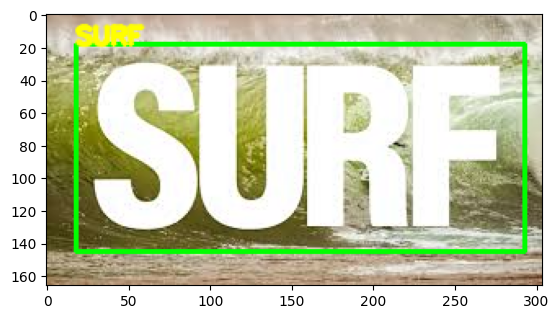

In [26]:
img=cv2.imread(img_path)
img=cv2.rectangle(img,top_left,bottom_right,(0,255,0),2)
img=cv2.putText(img,text,top_left,font,0.5,(255,255,0),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

In [27]:
im_path='/content/sign.png'
result=easyocr.Reader(['en'],gpu=False)
result=reader.readtext(im_path)
result

[([[19, 181], [165, 181], [165, 201], [19, 201]],
  'HEAD PROTECTION',
  0.9778256601171587),
 ([[31, 201], [153, 201], [153, 219], [31, 219]],
  'MUST BE WORN',
  0.9683688296531474),
 ([[39, 219], [145, 219], [145, 237], [39, 237]],
  'ON THIS SITE',
  0.9683973806374694)]

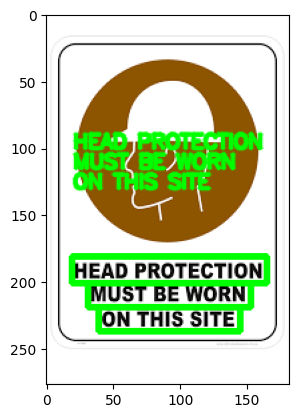

In [29]:
img=cv2.imread(im_path)
spacer=100
for detection in result:
  top_left=tuple(detection[0][0])
  bottom_right=tuple(detection[0][2])
  text=detection[1]
  img=cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
  img=cv2.putText(img,text,(20,spacer),font,0.5,(0,255,0),2,cv2.LINE_AA)
  spacer+=15
plt.imshow(img)
plt.show()